In [1]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/bookpage1.jpg"
img = url_to_image(url)
grayscaled = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)



downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/bookpage1.jpg


In [22]:
def cv2_imshow(img, cmap=None):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 15))
    
    if cmap:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=cmap)

Box filter

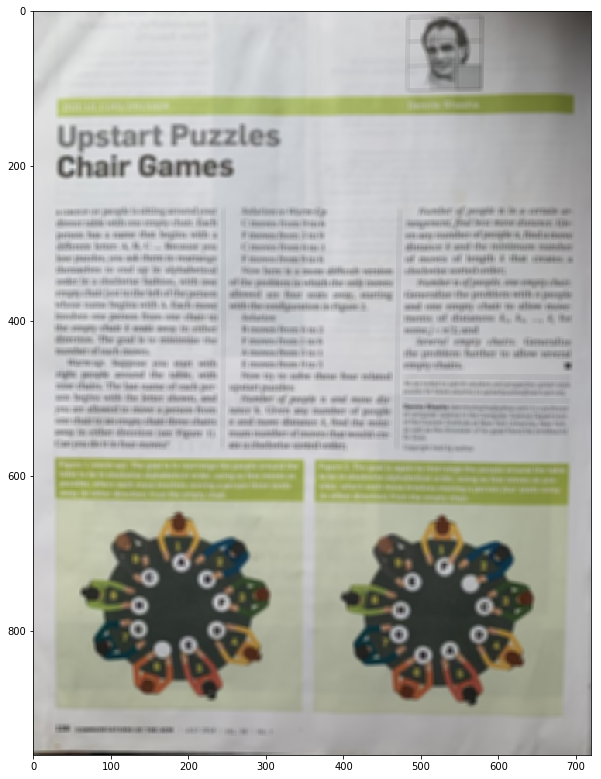

In [23]:
kernel = np.ones((7,7),np.float32)/49
im1 = cv2.filter2D(img,-1,kernel)
cv2_imshow(im1)

Gaussian Blur

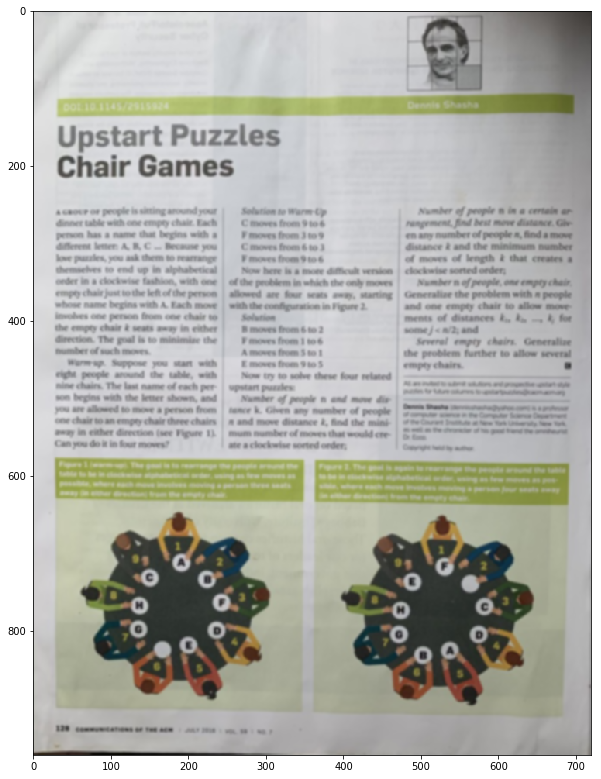

In [24]:
im2 = cv2.GaussianBlur(img,(7,7),0)
cv2_imshow(im2)

Білатеральний фільтр

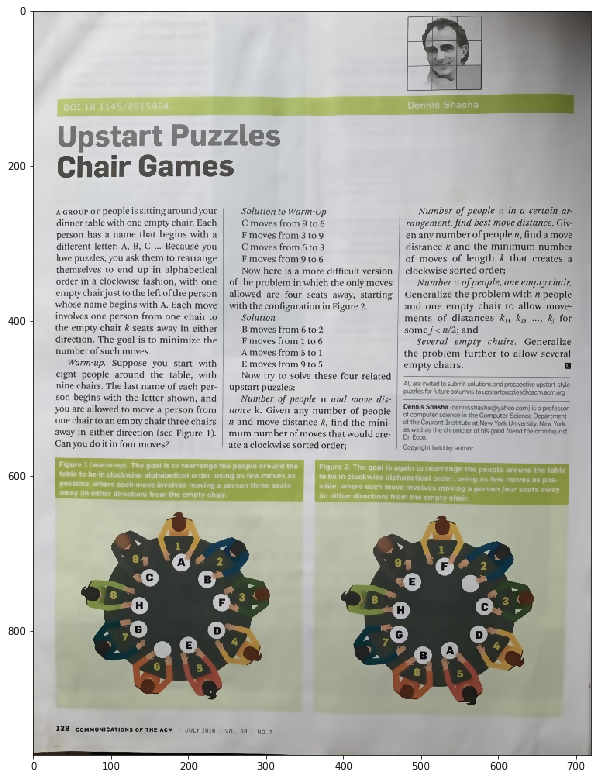

In [25]:
im3 = cv2.bilateralFilter(img,9,75,75)
cv2_imshow(im3)

Поріг

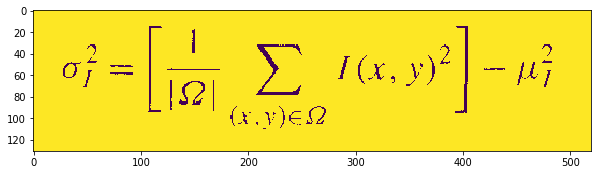

In [28]:
retval, threshold = cv2.threshold(grayscaled, 24, 255, cv2.THRESH_BINARY)
cv2_imshow(threshold, cmap='gray')

Інверсія

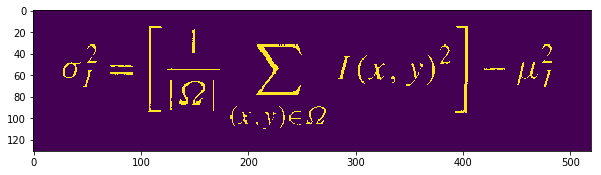

In [27]:
t_inv = (255-threshold)
cv2_imshow(t_inv)

  

Ерозія і дилатація

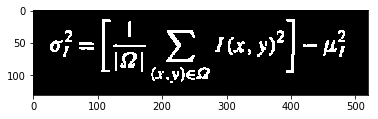

In [17]:
kernel = np.ones((3,3), np.uint8) 
img_erosion = cv2.erode(threshold, kernel, iterations=1) 
img_dilation = cv2.dilate(t_inv, kernel, iterations=1) 
cv2_imshow(img_erosion)
cv2_imshow(img_dilation)

## Task 1

### Text separation

In [120]:
img = cv2.imread('./images/text1.jpg')

<Figure size 1080x720 with 0 Axes>

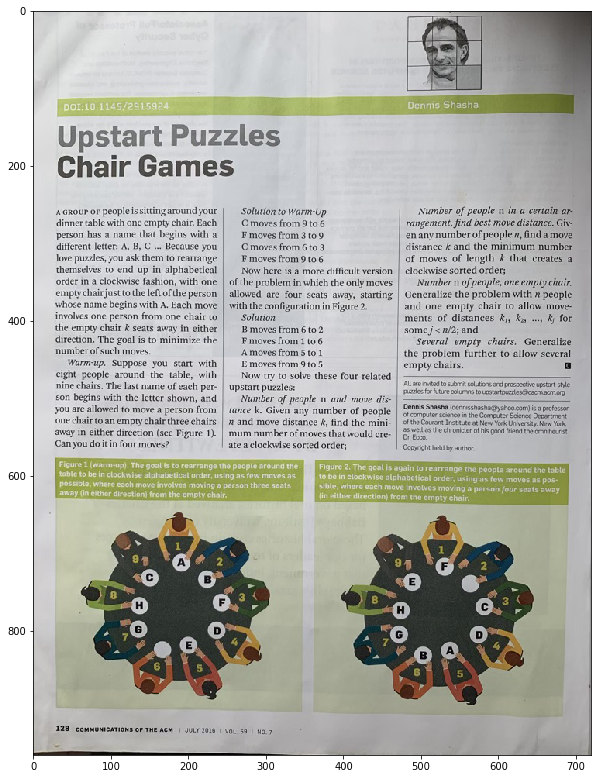

In [121]:
plt.figure(figsize=(15, 10))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

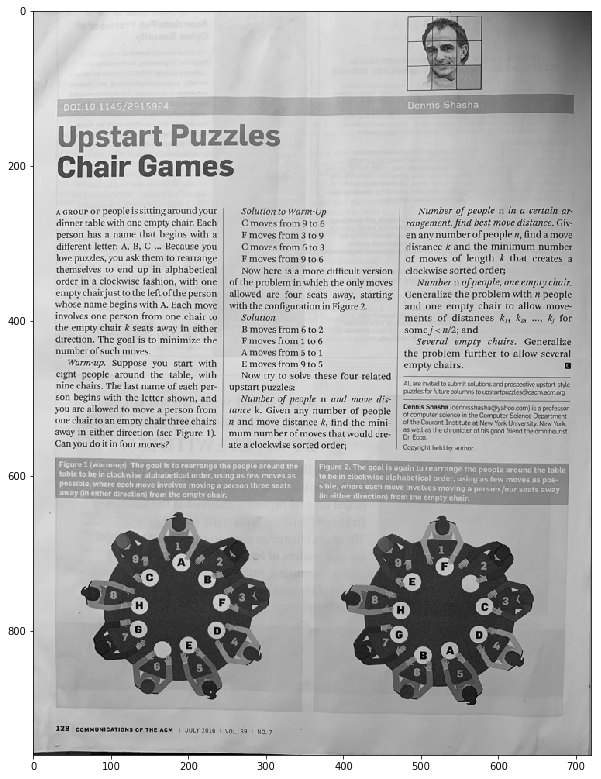

In [122]:
# convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10, 15))
plt.imshow(gray_img, cmap='gray')

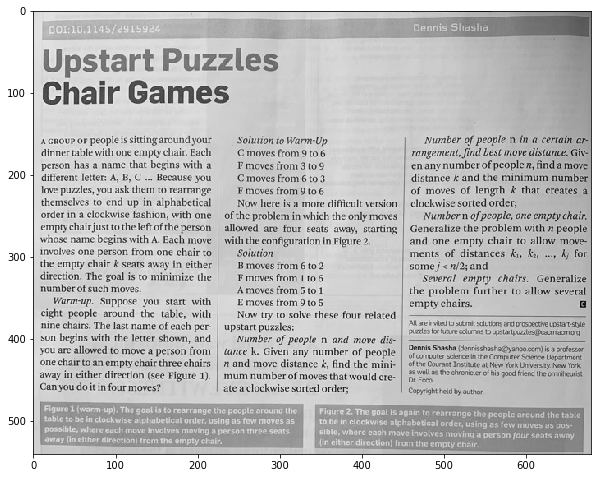

In [123]:
cropped_image = gray_img[100:640, 20:700,]
plt.figure(figsize=(10, 15))
plt.imshow(cropped_image, cmap='gray')

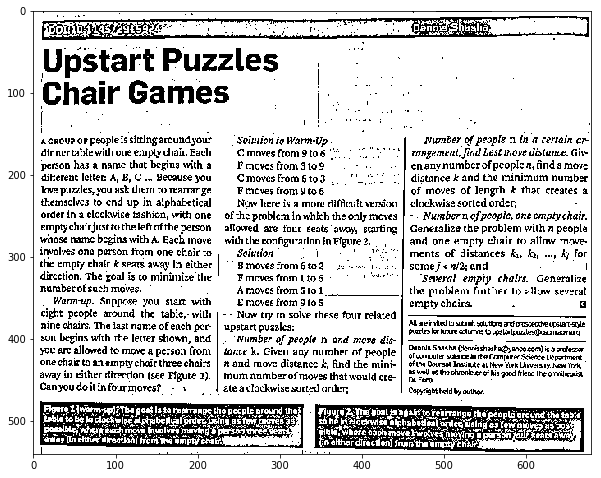

In [124]:
threshold = cv2.adaptiveThreshold(cropped_image, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 5)
plt.figure(figsize=(10, 15))
plt.imshow(threshold, cmap='gray')

In [125]:
edges = cv2.Canny(cropped_image, 100, 200)

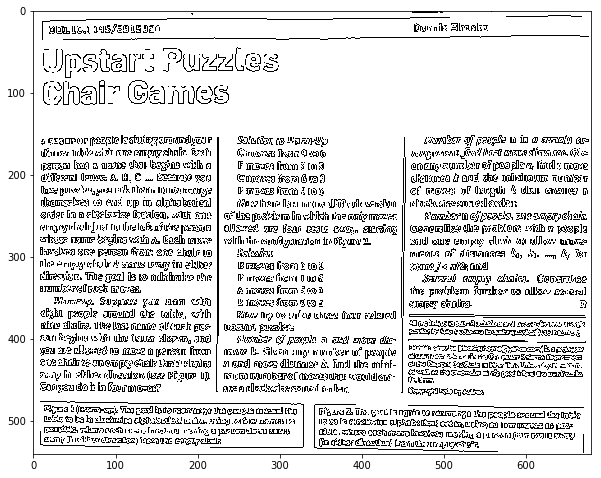

In [126]:
plt.figure(figsize=(10, 15))
plt.imshow(255 -edges, cmap='gray')

In [127]:
def plot_gray(image):
    plt.figure(figsize=(10, 15))
    plt.imshow(image, cmap='gray')

In [128]:
img_gray = gray_img.copy()

In [132]:
ele_size=(18,20)

img_sobel = cv2.Sobel(img_gray, cv2.CV_8U,1,0)#same as default,None,3,1,0,cv2.BORDER_DEFAULT)
img_threshold = cv2.threshold(img_sobel,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY)
element = cv2.getStructuringElement(cv2.MORPH_RECT,ele_size)
img_threshold = cv2.morphologyEx(img_threshold[1],cv2.MORPH_CLOSE,element)
contours = cv2.findContours(img_threshold,0,1)
Rect = [cv2.boundingRect(i) for i in contours[1] if i.shape[0]>100]
RectP = [(int(i[0]-i[2]*0.08),int(i[1]-i[3]*0.08),int(i[0]+i[2]*1.1),int(i[1]+i[3]*1.1)) for i in Rect]

for i in RectP[1:2]:
    cv2.rectangle(img_gray,i[:2],i[2:],(0,0,255))


In [137]:
print(RectP[0:2])

[(10, 919, 337, 952), (-22, 201, 764, 961)]


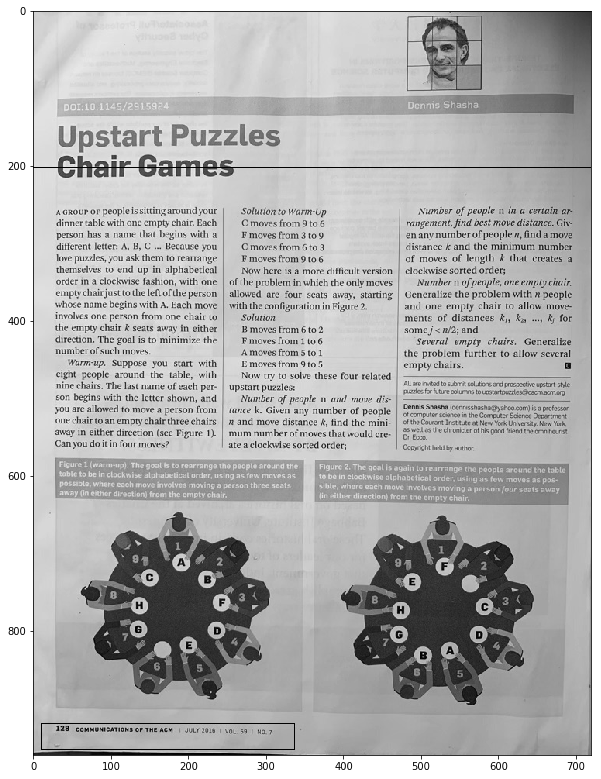

In [134]:
plot_gray(img_gray)